In [5]:
import numpy as np
from pyproj import Transformer
import matplotlib.pyplot as plt
import wradlib as wrl

raw = wrl.io.read_opera_hdf5('C:/Users/sverrirhd/vedurgogn/radar/2020/202001/2020010100050000dBZ.vol.hdf5')

In [2]:

transformer_gps_isl = Transformer.from_crs("epsg:4326", "epsg:3057" ) # Umbreyta GPS staðsetningu yfir í cartesian hnit fyrir Ísland
transformer_isl_gps = Transformer.from_crs("epsg:3057", "epsg:4326") # Umbreyta cartesian hnitum aftur í GPS hnit

lat,lon,alt = radar_coordinates = (64.026383, -22.635833, 47)
radar_shape = (8, 420, 120)

In [25]:
az_angle_bins = np.array([[float(j) for j in (i.split(':'))] for i in raw['dataset1/how']['azangles'].decode().split(',')])

In [38]:
raw

{'dataset1/data1/data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'dataset1/data1/what': {'gain': 0.5,
  'nodata': -1.0,
  'offset': -32.0,
  'quantity': b'DBZH',
  'undetect': 0.0},
 'dataset1/how': {'azangles': b'0:0.856934,0.856934:1.71387,1.71387:2.5708,2.5708:3.42773,3.42773:4.28467,4.28467:5.1416,5.1416:5.99854,5.99854:6.85547,6.85547:7.7124,7.7124:8.56934,8.56934:9.42627,9.42627:10.2832,10.2832:11.1401,11.1401:11.9971,11.9971:12.854,12.854:13.7109,13.7109:14.5679,14.5679:15.4248,15.4248:16.2817,16.2817:17.1387,17.1387:17.9956,17.9956:18.8525,18.8525:19.7095,19.7095:20.5664,20.5664:21.4233,21.4233:22.2803,22.2803:23.1372,23.1372:23.9941,23.9941:24.8511,24.8511:25.708,25.708:26.5649,26.5649:27.4219,27.4219:28.2788,28.2788:29.1357,29.1357:29.9927,29.9927:30.8496,30.8496:31.7065,31.7065:32.5635,32.5635

In [42]:
distance = 240 # maximum range of radar (in Km)
angles = [0.5,1.297,2.396,5.0,7.0,10.0,15.0,20.0,]#[0.5, 1.3, 2.4, 5.0, 7.0, 10.0, 15.0, 20.0] # Angle with surface
rotations = az_angle_bins[:,0]# np.linspace(0,360,420)
distances = np.arange(0,240,2)

# Distance from radar to reykjavik
rad_rvk_dist = 40

In [43]:
0.856934,0.856934

(0.856934, 0.856934)

## Visualization of Radar lines and distance to Reykjavík

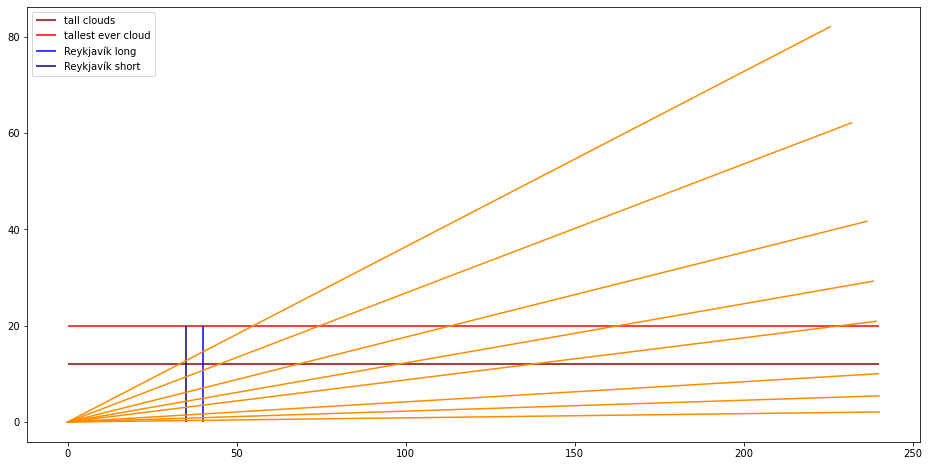

In [44]:
plt.figure(figsize=(16,8))
for ang in angles:
    plt.plot([0,np.cos(ang/180*np.pi)*240],
             [0,np.sin(ang/180*np.pi)*240],c = 'darkorange')
plt.hlines(12,0,240,label='tall clouds',color = 'darkred')
plt.hlines(20,0,240,label='tallest ever cloud',color = 'red')
plt.vlines(rad_rvk_dist,0,20, label = 'Reykjavík long',color='blue')
plt.vlines(rad_rvk_dist-5,0,20,label = 'Reykjavík short',color='darkblue')
plt.legend()

## Visualize Beam Propagation showing earth curvature

In [45]:
# import wradlib as wrl
# fig = plt.figure(figsize=(10, 6))

# cgax, caax, paax = wrl.vis.create_cg(fig=fig, rot=0, scale=1)

# # azimuth angle
# angle = 225

# # fix grid_helper
# er = 6370000
# gh = cgax.get_grid_helper()
# gh.grid_finder.grid_locator2._nbins=80
# gh.grid_finder.grid_locator2._steps=[1,2,4,5,10]

# # calculate beam_height and arc_distance for ke=1
# # means line of sight
# bhe = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er, ke=1.)
# ade = wrl.georef.bin_distance(r, 0, sitecoords[2], re=er, ke=1.)
# nn0 = np.zeros_like(r)
# # for nice plotting we assume earth_radius = 6370000 m
# ecp = nn0 + er
# # theta (arc_distance sector angle)
# thetap = - np.degrees(ade/er) + 90.0

# # zero degree elevation with standard refraction
# bh0 = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er)

# # plot (ecp is earth surface normal null)
# bes, = paax.plot(thetap, ecp, '-k', linewidth=3, label='Earth Surface NN')
# bc, = paax.plot(thetap, ecp + alt[angle, :], '-b', linewidth=3, label='Beam Center')
# bc0r, = paax.plot(thetap, ecp + bh0 + alt[angle, 0] , '-g', label='0 deg Refraction')
# bc0n, = paax.plot(thetap, ecp + bhe + alt[angle, 0], '-r', label='0 deg line of sight')
# b3db, = paax.plot(thetap, ecp + alt[angle, :]  + beamradius, ':b', label='+3 dB Beam width')
# paax.plot(thetap, ecp + alt[angle, :] - beamradius, ':b', label='-3 dB Beam width')

# # orography
# paax.fill_between(thetap, ecp,
#                   ecp + polarvalues[angle, :],
#                   color='0.75')

# # shape axes
# cgax.set_xlim(0, np.max(ade))
# cgax.set_ylim([ecp.min()-1000, ecp.max()+2500])
# caax.grid(True, axis='x')
# cgax.grid(True, axis='y')
# cgax.axis['top'].toggle(all=False)
# caax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(steps=[1,2,4,5,10], nbins=20, prune='both'))
# caax.xaxis.set_major_locator(mpl.ticker.MaxNLocator())
# caax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(height_formatter))
# caax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(range_formatter))

# caax.set_xlabel('Range (km)')
# caax.set_ylabel('Altitude (km)')

# legend = paax.legend((bes, bc0n, bc0r, bc, b3db),
#                     ('Earth Surface NN', '0 deg line of sight', '0 deg std refraction', 'Beam Center', '3 dB Beam width'),
#                     loc='upper left', fontsize=10)


# Compute real world locations of radar data pixels

In [46]:
coordinates = np.zeros((8,420,120,3),dtype = float)
coordinates_isl = np.zeros((8,420,120,3),dtype = float)
isl_hnit = np.array(transformer_gps_isl.transform(lat,lon))


for i,ang in enumerate(angles):
    for j,rot in enumerate(rotations):
        for k,dist in enumerate(distances):
            # print(i,j,k)
            height = np.sin(ang*np.pi/180) * dist * 1000 + alt # Height in meters (Given straight line and flat earth)

            horizontal_offset = np.cos(ang*np.pi/180) * dist * 1000 # Distance in meters (Given straight line and flat earth)
            
            # Offset hnita í íslenska hnitakerfinu (ATH prófa að svissa sin og cos) ############################################################################################################################
            x_offset = np.cos(rot*np.pi/180) * horizontal_offset
            y_offset = np.sin(rot*np.pi/180) * horizontal_offset
            new_x = isl_hnit[0] + x_offset
            new_y = isl_hnit[1] + y_offset
            
            (new_x_gps,new_y_gps) = transformer_isl_gps.transform(new_x,new_y)

            coordinates[i,j,k,:] = np.array([new_x_gps,new_y_gps,height])
            coordinates_isl[i,j,k,:] = np.array([new_x,new_y,height])


# Radar pixels in Icelandic local coordinate system (in meters) [ISN93 / Lambert 1993](https://epsg.io/3057)

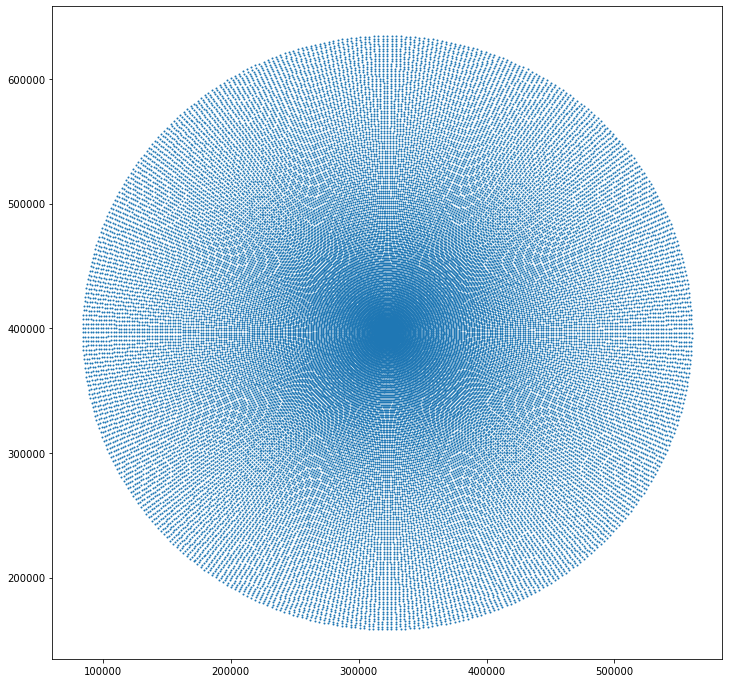

In [47]:
tmp_x_y = coordinates_isl[0].reshape(-1,3)
tmp_x_y_gps = coordinates[0].reshape(-1,3)

plt.figure(figsize=(12,12))
plt.scatter(tmp_x_y[:,0],tmp_x_y[:,1],s=1)

In [48]:
def get_frame(centre = [64.1285031, -21.9524],scale=1):
    x,y = centre
    dx = 0.004*scale
    dy = 0.01*scale

    outline = shapely.geometry.box(x-dx,y-dy,x+dx,y+dy).boundary
    return x,y,outline

In [49]:
import folium
import shapely
from shapely import geometry, ops

center = [64.1274, -21.9024]
m = folium.Map(
    location=center,
    zoom_start=12,
    tiles='openstreetmap'
)

x,y,outline = get_frame(center,  20)


# for tmp_coords in coordinates:
#     tmp_x_y_gps = tmp_coords.reshape(-1,3)[:,:-1]

for coords in tmp_x_y_gps:
    shapely_point = shapely.geometry.Point(coords)
    if outline.convex_hull.contains(shapely_point):
        folium.Marker([coords[0],coords[1]]).add_to(m)


m

In [50]:
# tmp = 
# polygons = [i for i in tmp]

# Shapefiles

In [14]:
import geopandas as gpd

In [15]:
# import fiona
# fiona.__version__

In [16]:
iceland = gpd.read_file('./Shapefiles/Iceland/geoBoundariesSimplified-3_0_0-ISL-ADM0.shp')
postnr = gpd.read_file('./Shapefiles/postnr/postnrs.shp')

### Extract iceland polygons

In [17]:
iceland_polygons_tmp = [poly for poly in iceland.loc[0,'geometry']]

iceland_polygons = []
iceland_polygons_isl = []

for poly in iceland_polygons_tmp:
    poly_gps = np.array(poly.exterior.coords.xy).T[:,[1,0]]
    poly_isl = [transformer_gps_isl.transform(x,y) for x,y in poly_gps]
    iceland_polygons.append(shapely.geometry.polygon.Polygon(poly_gps))
    iceland_polygons_isl.append(shapely.geometry.polygon.Polygon(poly_isl))

In [18]:
# np.array(iceland_polygons[0].exterior.coords.xy).T[:,[1,0]]

### Extract Postnumber polygons

In [19]:
postnr.NAME.value_counts()

Reykjavík                 15
Selfoss, dreifbýli         6
Reykjanesbær               5
Akureyri, dreifbýli        5
Kópavogur                  4
                          ..
Mývatn                     1
Hvolsvöllur, dreifbýli     1
Hella, dreifbýli           1
Grundarfjörður             1
Bíldudalur                 1
Name: NAME, Length: 141, dtype: int64

True

In [20]:

sveitarfélög = ['Reykjavík','Seltjarnarnes','Mosfellsbær','Kópavogur','Garðabær']
postnr_of_interest = postnr.loc[postnr.NAME.isin(sveitarfélög) ,]
postnr_polygons_isl = []

for index,row in postnr_of_interest.iterrows():
    # Break apart multipolygons if needed
    if type(row.geometry) == shapely.geometry.multipolygon.MultiPolygon:
        for poly in row.geometry:
            postnr_polygons_isl.append(poly)
    else:
        postnr_polygons_isl.append(row.geometry)

postnr_polygons = []
for poly in postnr_polygons_isl:
    coords = poly.exterior.coords
    gps_coords = [transformer_isl_gps.transform(x,y) for x,y in coords]
    polygon = shapely.geometry.polygon.Polygon(gps_coords)
    postnr_polygons.append(polygon)

## Visualize iceland and postnumbers assigned to Reykjavík

In [21]:
mainland_id = np.argmax([x.area for x in iceland_polygons])

In [22]:
center = [64.1274, -21.9024]
m = folium.Map(
    location=center,
    zoom_start=12,
    tiles='openstreetmap'
)

x,y,outline = get_frame(center,  20)


for poly in iceland_polygons:
    
    folium.Polygon([(x,y) for x,y in poly.exterior.coords]).add_to(m)

for poly in postnr_polygons:
    
    folium.Polygon([(x,y) for x,y in poly.exterior.coords],color='green').add_to(m)

m

### Combined polygon for postnumbers of interest

In [23]:
capital_area = shapely.ops.cascaded_union(postnr_polygons)
mainland_capital_area_id = np.argmax([i.area for i in capital_area])
mainland_capital_area = capital_area[mainland_capital_area_id]

In [24]:
coordinates.shape

(8, 420, 120, 3)

In [25]:
point_distances = [mainland_capital_area.distance(shapely.geometry.Point(x,y)) for x,y,z in coordinates.reshape(-1,3)]


In [26]:
distances = np.array(point_distances)

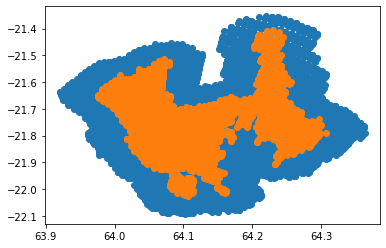

In [27]:
points_within = coordinates.reshape(-1,3)[distances <= 0]
points_close = coordinates.reshape(-1,3)[distances <= 0.05]
plt.scatter(points_close[:,0],points_close[:,1])
plt.scatter(points_within[:,0],points_within[:,1])

In [28]:
print('Total number of points within area:',len(points_within))

Total number of points within area: 2536


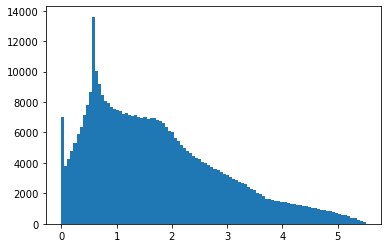

In [29]:
plt.hist(distances,bins = 100)
plt.show()

In [30]:
np.array(mainland_capital_area.exterior.coords.xy).T

array([[ 64.15179223, -21.98340878],
       [ 64.15187184, -21.98347726],
       [ 64.15193779, -21.9835742 ],
       ...,
       [ 64.15153395, -21.98275221],
       [ 64.15168676, -21.9831998 ],
       [ 64.15179223, -21.98340878]])

In [31]:
# for i in capital_area:
#     print(capital_area.area)

## Find the subset of radar points within some distance of the capital area 

In [32]:
# capital_area.exterior.coords.xy

# 3D Visualization

In [33]:
import open3d as o3d

ModuleNotFoundError: No module named 'open3d'

In [ ]:
print("Let's draw a box using o3d.geometry.LineSet.")

points = np.array(iceland_polygons_isl[mainland_id].exterior.coords.xy).T
points = np.c_[points,np.zeros(len(points))]
lines = np.c_[np.arange(0,len(points)),np.arange(1,len(points)+1)]
lines[-1,1] = 0

colors = [[1, 0, 0] for i in range(len(lines))]
line_set = o3d.geometry.LineSet(
    points=o3d.utility.Vector3dVector(points),
    lines=o3d.utility.Vector2iVector(lines),
)

In [ ]:
point_cloud = coordinates_isl.reshape(-1,3)[np.argwhere(distances <= 0.05)].reshape((-1,3))

In [ ]:
point_cloud

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud)
pcd.colors = o3d.utility.Vector3dVector([0,0,1] for i in range(len(point_cloud)))


In [ ]:
point_cloud

In [ ]:
o3d.visualization.draw_geometries([line_set,pcd])

In [ ]:
point_cloud

In [ ]:
# tmp_trinagle_mesh = shapely.ops.triangulate([0].exterior)


In [ ]:
triangles = []
for i in tmp_trinagle_mesh:
    triangles.append(np.array(i.exterior.coords.xy).T[:3])

triangles = np.array(triangles)

In [ ]:
triangle_points = triangles.reshape(-1,2)
triangle_points_3d = np.c_[triangle_points,np.zeros(len(triangle_points))]

In [ ]:
triangles.shape

In [ ]:
tm. =  o3d.utility.Vector3dVector(triangle_points_3d)

In [ ]:
np.array(tm.triangles)

In [ ]:
tm = o3d.geometry.TriangleMesh()
